<a href="https://colab.research.google.com/github/cmsiy07/timeforecastingwind/blob/main/WindData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import torch

# Check if CUDA (GPU support) is available
torch.cuda.is_available()

# Check and print the GPU device name if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("No GPU available, using CPU instead.")

GPU: Tesla T4


In [ ]:
# -----------------------------------------------------
# Import python library for data analysis and plotting
# -----------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
from matplotlib import font_manager
import seaborn as sns

In [ ]:
# ------------------------------
# Load data from the folder path
# ------------------------------

main_path= "/content/drive/MyDrive/winddata"
df1=pd.read_csv('/content/drive/MyDrive/winddata/TenneTTSO.csv')
df2=pd.read_csv('/content/drive/MyDrive/winddata/50Hertz.csv')
df3=pd.read_csv('/content/drive/MyDrive/winddata/TransnetBW.csv')
df4=pd.read_csv('/content/drive/MyDrive/winddata/Amprion.csv')

In [ ]:
# Now we will see the shape of our data
print("columns in dataframe1=",df1.shape[1]," And rows are=",df1.shape[0])
print("columns in dataframe2=",df2.shape[1]," And rows are=",df2.shape[0])
print("columns in dataframe3=",df3.shape[1]," And rows are=",df3.shape[0])
print("columns in dataframe4=",df4.shape[1]," And rows are=",df4.shape[0])

columns in dataframe1= 97  And rows are= 397
columns in dataframe2= 97  And rows are= 397
columns in dataframe3= 97  And rows are= 397
columns in dataframe4= 97  And rows are= 397


In [ ]:
# lets check for the Total No of Numerical and categorical variable
print("Total No of Cat Features=",sum(df1.dtypes=='object'))
print("Total No of Numr Features=",sum(df1.dtypes=='float'))

Total No of Cat Features= 1
Total No of Numr Features= 96


In [ ]:
# Lets check if our data contains any null values or not if any than we will do further analysis
count=0
for i in df1.isnull().sum():
    if i==1 :
        count=1
if(count==0):
    print("No NUll Value in Df1")

count=0
for i in df2.isnull().sum():
    if i==1 :
        count=1
if(count==0):
    print("No NUll Value in Df2")
count=0
for i in df3.isnull().sum():
    if i==1 :
        count=1
if(count==0):
    print("No NUll Value in Df3")
count=0
for i in df4.isnull().sum():
    if i==1 :
        count=1
if(count==0):
    print("No NUll Value in Df4")

No NUll Value in Df1
No NUll Value in Df2
No NUll Value in Df3
No NUll Value in Df4


In [ ]:
#lets print some of the rows to check data
df1.head(2)

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,9.68,10.16,10.94,11.39,12.09,12.79,13.33,13.88,14.73,...,73.52,74.03,74.77,73.32,74.83,73.10,71.26,71.95,69.97,69.58
1,24/08/2019,67.94,67.52,64.48,64.78,65.75,65.07,63.39,63.69,64.37,...,116.79,114.30,110.81,109.76,106.55,102.31,99.04,96.57,94.75,91.73


In [ ]:
#transform data to vertical
df1.dtypes

Date         object
00:00:00    float64
00:15:00    float64
00:30:00    float64
00:45:00    float64
             ...   
22:45:00    float64
23:00:00    float64
23:15:00    float64
23:30:00    float64
23:45:00    float64
Length: 97, dtype: object

In [ ]:
#change date into datetime

In [ ]:
df1["Date"] =  pd.to_datetime(df1["Date"])

<ipython-input-15-7551144a6166>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1["Date"] =  pd.to_datetime(df1["Date"])


In [ ]:
df2["Date"] =  pd.to_datetime(df2["Date"])
df3["Date"] =  pd.to_datetime(df3["Date"])
df4["Date"] =  pd.to_datetime(df4["Date"])

<ipython-input-71-5523ae22fa96>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2["Date"] =  pd.to_datetime(df2["Date"])
<ipython-input-71-5523ae22fa96>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df3["Date"] =  pd.to_datetime(df3["Date"])
<ipython-input-71-5523ae22fa96>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df4["Date"] =  pd.to_datetime(df4["Date"])


In [ ]:
df1.dtypes

Date        datetime64[ns]
00:00:00           float64
00:15:00           float64
00:30:00           float64
00:45:00           float64
                 ...      
22:45:00           float64
23:00:00           float64
23:15:00           float64
23:30:00           float64
23:45:00           float64
Length: 97, dtype: object

In [ ]:
#transform to vertical data

# ---------------------------------------------------
# Tranform horizontal data format to vertical format
# ---------------------------------------------------


# Create definition ------------------------------------------------------------------------------------
def change_to_vertical_data(each_data, plant_name):

    # get the EC data only and reshape into one single column
    kwh_data_arr= each_data.iloc[:, 1:].values.reshape(-1,)

    # get the date, hour, minute into a one column
    date_all= each_data["Date"]

    # get the 15min interval for the above each date
    date_new = []
    for i in range(len(date_all)):
      date_new.append(pd.date_range(date_all[i], date_all[i] + pd.Timedelta(days=1), freq="15T")[:-1])  ## here is the list of date & hour for each day

    # make the new dataframe
    df_new = pd.DataFrame()
    df_new["Date"] = np.hstack([*date_new])                                                 ## here, we combine all the date & hour for all days (date & hour)

    df_new["Date_only"]= pd.to_datetime(df_new["Date"]).dt.date.values.astype(str)
    df_new["Year"]= pd.to_datetime(df_new["Date"]).dt.year.values
    df_new["Month"]= pd.to_datetime(df_new["Date"]).dt.month.values
    df_new["Day"]= pd.to_datetime(df_new["Date"]).dt.day.values
    df_new["Hour"]= pd.to_datetime(df_new["Date"]).dt.hour.values
    df_new["Minute"]= pd.to_datetime(df_new["Date"]).dt.minute.values
    df_new["kWh"]= kwh_data_arr
    df_new["plant_name"] = plant_name

    return df_new


In [ ]:
df1_new = pd.DataFrame()

df1_new = pd.concat([df1_new,change_to_vertical_data(each_data= df1, plant_name = "TennetTSO")])

In [ ]:
type(df1_new)

pandas.core.frame.DataFrame

In [ ]:
df2_new = pd.DataFrame()
df2_new = pd.concat([df2_new,change_to_vertical_data(each_data= df2, plant_name = "50Hertz")])

In [ ]:

df3_new = pd.DataFrame()
df3_new = pd.concat([df3_new,change_to_vertical_data(each_data= df3, plant_name = "TransnetBW")])
df4_new = pd.DataFrame()
df4_new = pd.concat([df4_new,change_to_vertical_data(each_data= df4, plant_name = "Ampiron")])

In [ ]:
wind_df = [df1_new, df2_new, df3_new, df4_new]
combined_wind_df = pd.concat(wind_df)

In [ ]:
combined_wind_df

,Date,Date_only,Year,Month,Day,Hour,Minute,kWh,plant_name
0,2019-08-23 00:00:00,2019-08-23,2019,8,23,0,0,9.68,TennetTSO
1,2019-08-23 00:15:00,2019-08-23,2019,8,23,0,15,10.16,TennetTSO
2,2019-08-23 00:30:00,2019-08-23,2019,8,23,0,30,10.94,TennetTSO
3,2019-08-23 00:45:00,2019-08-23,2019,8,23,0,45,11.39,TennetTSO
4,2019-08-23 01:00:00,2019-08-23,2019,8,23,1,0,12.09,TennetTSO
...,...,...,...,...,...,...,...,...,...
38107,2020-09-22 22:45:00,2020-09-22,2020,9,22,22,45,12.00,Ampiron
38108,2020-09-22 23:00:00,2020-09-22,2020,9,22,23,0,12.00,Ampiron
38109,2020-09-22 23:15:00,2020-09-22,2020,9,22,23,15,13.00,Ampiron
38110,2020-09-22 23:30:00,2020-09-22,2020,9,22,23,30,13.00,Ampiron


from matplotlib import pyplot as plt
combined_wind_df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df['Day'].plot(kind='hist', bins=20, title='Day')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df['Hour'].plot(kind='hist', bins=20, title='Hour')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
combined_wind_df.groupby('plant_name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df.plot(kind='scatter', x='Year', y='Month', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df.plot(kind='scatter', x='Month', y='Day', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df.plot(kind='scatter', x='Day', y='Hour', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df.plot(kind='scatter', x='Hour', y='Minute', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Month']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = combined_wind_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('plant_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='plant_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Month')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Day']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = combined_wind_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('plant_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='plant_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Day')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Hour']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = combined_wind_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('plant_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='plant_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Hour')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Minute']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = combined_wind_df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('plant_name')):
  _plot_series(series, series_name, i)
  fig.legend(title='plant_name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Minute')

from matplotlib import pyplot as plt
combined_wind_df['Year'].plot(kind='line', figsize=(8, 4), title='Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df['Day'].plot(kind='line', figsize=(8, 4), title='Day')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
combined_wind_df['Hour'].plot(kind='line', figsize=(8, 4), title='Hour')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(combined_wind_df['plant_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_wind_df, x='Year', y='plant_name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(combined_wind_df['plant_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_wind_df, x='Month', y='plant_name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(combined_wind_df['plant_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_wind_df, x='Day', y='plant_name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(combined_wind_df['plant_name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_wind_df, x='Hour', y='plant_name', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Text(0.5, 0, 'Amprion')

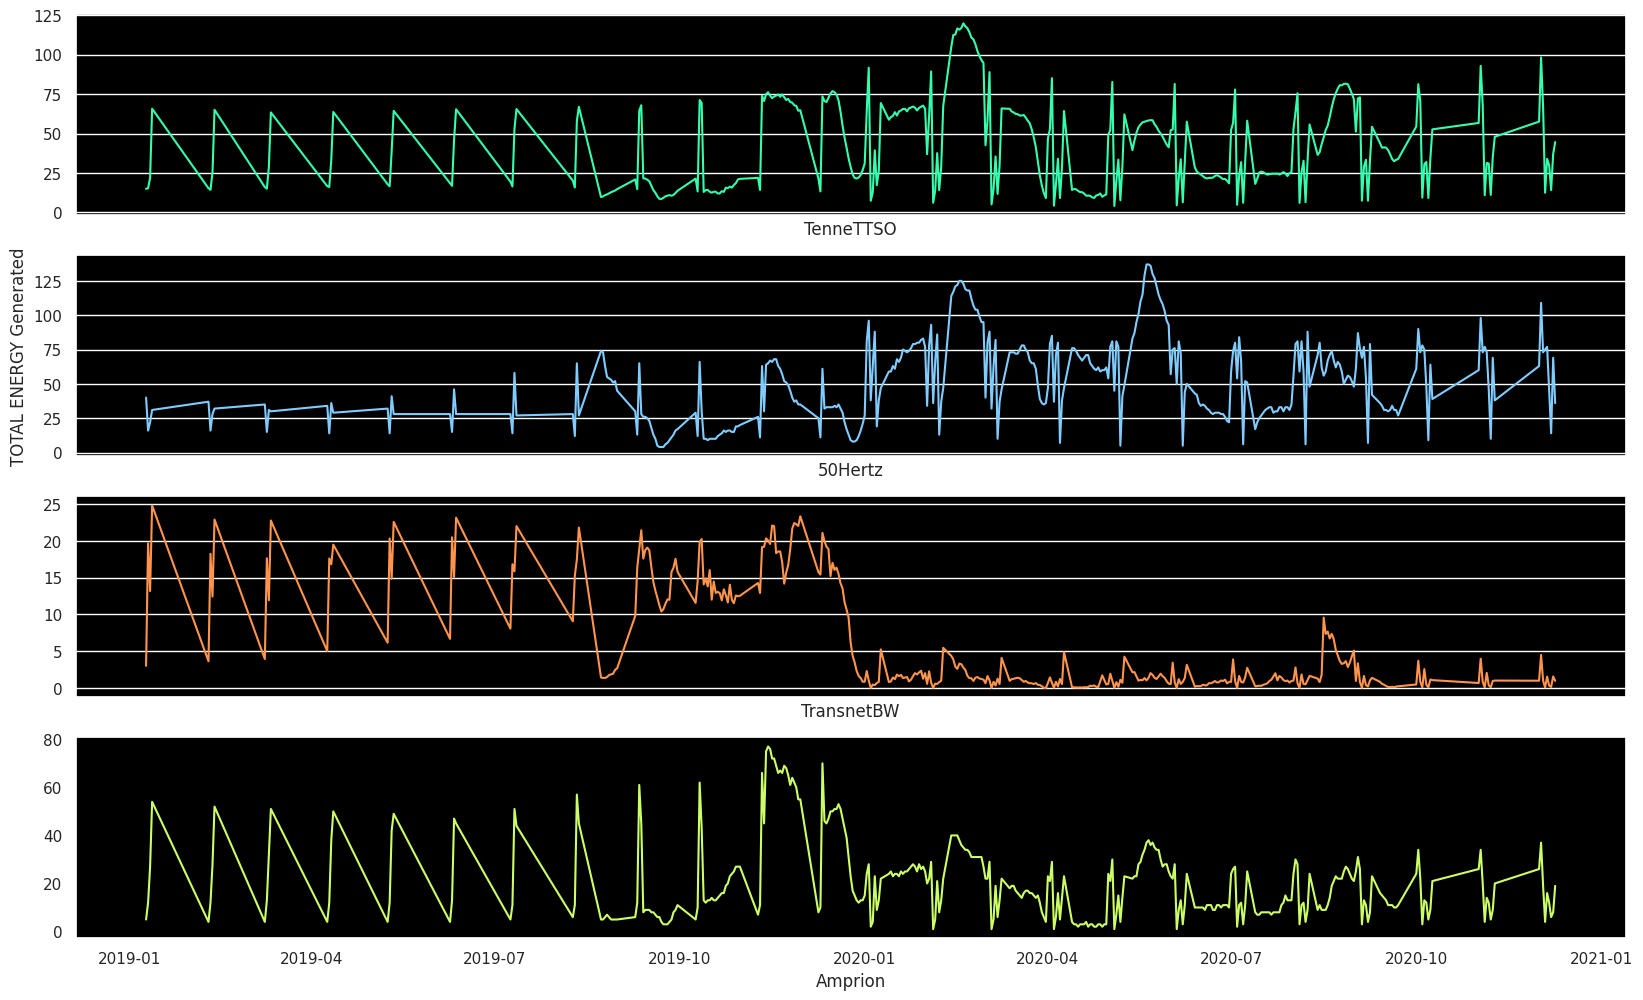

In [ ]:
sns.set(rc={'axes.facecolor':'#000000', 'figure.facecolor':'white'})
fig,ax=plt.subplots(4,1,figsize=(20,12))
#fig-1
sns.lineplot(x=df1['Date'],y=df1_new['kWh'],color='#33ffad',ax=ax[0])
plt.grid(False)
ax[0].set_xticks([])
ax[0].set_xlabel("TenneTTSO")
ax[0].set_ylabel("")
#fig-2
sns.lineplot(x=df2['Date'],y=df2_new['kWh'],color='#80ccff',ax=ax[1])
plt.grid(False)
ax[1].set_xticks([])
ax[1].set_ylabel("TOTAL ENERGY Generated")
ax[1].set_xlabel("50Hertz")
#fig-1
sns.lineplot(x=df3['Date'],y=df3_new['kWh'],color='#ff944d',ax=ax[2])
plt.grid(False)
ax[2].set_xticks([])
ax[2].set_xlabel("TransnetBW")
ax[2].set_ylabel("")
#fig-1
sns.lineplot(x=df4['Date'],y=df4_new['kWh'],color='#ccff66',ax=ax[3])
plt.grid(False)
ax[3].set_ylabel("")
ax[3].set_xlabel("Amprion")

In [ ]:
df1['total energy generated/day']=df1.sum(axis=1,numeric_only=True)
df1['mean energy generated/15 min']=df1.mean(axis=1,numeric_only=True)
df1['min energy during 15 min']=df1.min(axis=1,numeric_only=True)
df1['max energy during 15 minute']=df1.max(axis=1,numeric_only=True)

In [ ]:
df2['total energy generated/day']=df2.sum(axis=1,numeric_only=True)
df2['mean energy generated/15 min']=df2.mean(axis=1,numeric_only=True)
df2['min energy during 15 min']=df2.min(axis=1,numeric_only=True)
df2['max energy during 15 minute']=df2.max(axis=1,numeric_only=True)

In [ ]:
df3['total energy generated/day']=df3.sum(axis=1,numeric_only=True)
df3['mean energy generated/15 min']=df3.mean(axis=1,numeric_only=True)
df3['min energy during 15 min']=df3.min(axis=1,numeric_only=True)
df3['max energy during 15 minute']=df3.max(axis=1,numeric_only=True)

In [ ]:
df4['total energy generated/day']=df4.sum(axis=1,numeric_only=True)
df4['mean energy generated/15 min']=df4.mean(axis=1,numeric_only=True)
df4['min energy during 15 min']=df4.min(axis=1,numeric_only=True)
df4['max energy during 15 minute']=df4.max(axis=1,numeric_only=True)

In [ ]:
df1.drop(df1.loc[:,'00:00:00':'23:45:00'],axis=1,inplace=True)
df2.drop(df2.loc[:,'00:00:00':'23:45:00'],axis=1,inplace=True)
df3.drop(df3.loc[:,'00:00:00':'23:45:00'],axis=1,inplace=True)
df4.drop(df4.loc[:,'00:00:00':'23:45:00'],axis=1,inplace=True)

In [ ]:
df1.head(3)

,Date,total energy generated/day,mean energy generated/15 min,min energy during 15 min,max energy during 15 minute
0,2019-08-23,2655.76,54.757938,8.54,2655.76
1,2019-08-24,6567.33,135.408866,21.47,6567.33
2,2019-08-25,3501.63,72.198557,4.06,3501.63


Text(0.5, 1.0, 'Mean Energy generation in each 15 min')

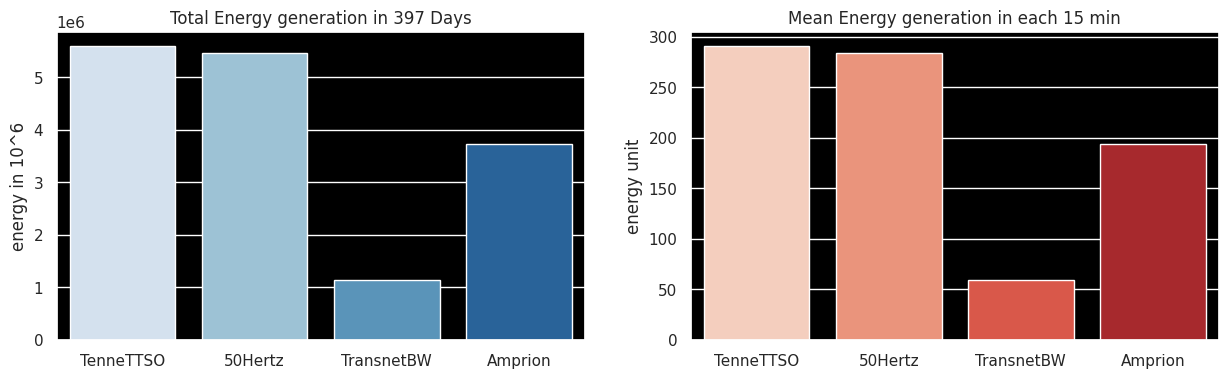

In [ ]:
import plotly.express as px

# first lets describe about data
y=[df1['total energy generated/day'].sum(),df2['total energy generated/day'].sum(),df3['total energy generated/day'].sum(),df4['total energy generated/day'].sum()]
fig,ax=plt.subplots(1,2,figsize=(15,4))
#fig-1
sns.barplot(y=y,x=["TenneTTSO","50Hertz","TransnetBW","Amprion"],palette="Blues",ax=ax[0])
ax[0].set_ylabel("energy in 10^6")
ax[0].set_title("Total Energy generation in 397 Days")
#fig-2
y=[df1['mean energy generated/15 min'].mean(),df2['mean energy generated/15 min'].mean(),df3['mean energy generated/15 min'].mean(),df4['mean energy generated/15 min'].mean()]
sns.barplot(y=y,x=["TenneTTSO","50Hertz","TransnetBW","Amprion"],palette="Reds",ax=ax[1])
ax[1].set_ylabel("energy unit")
ax[1].set_title("Mean Energy generation in each 15 min")

Text(0.5, 0, 'Amprion')

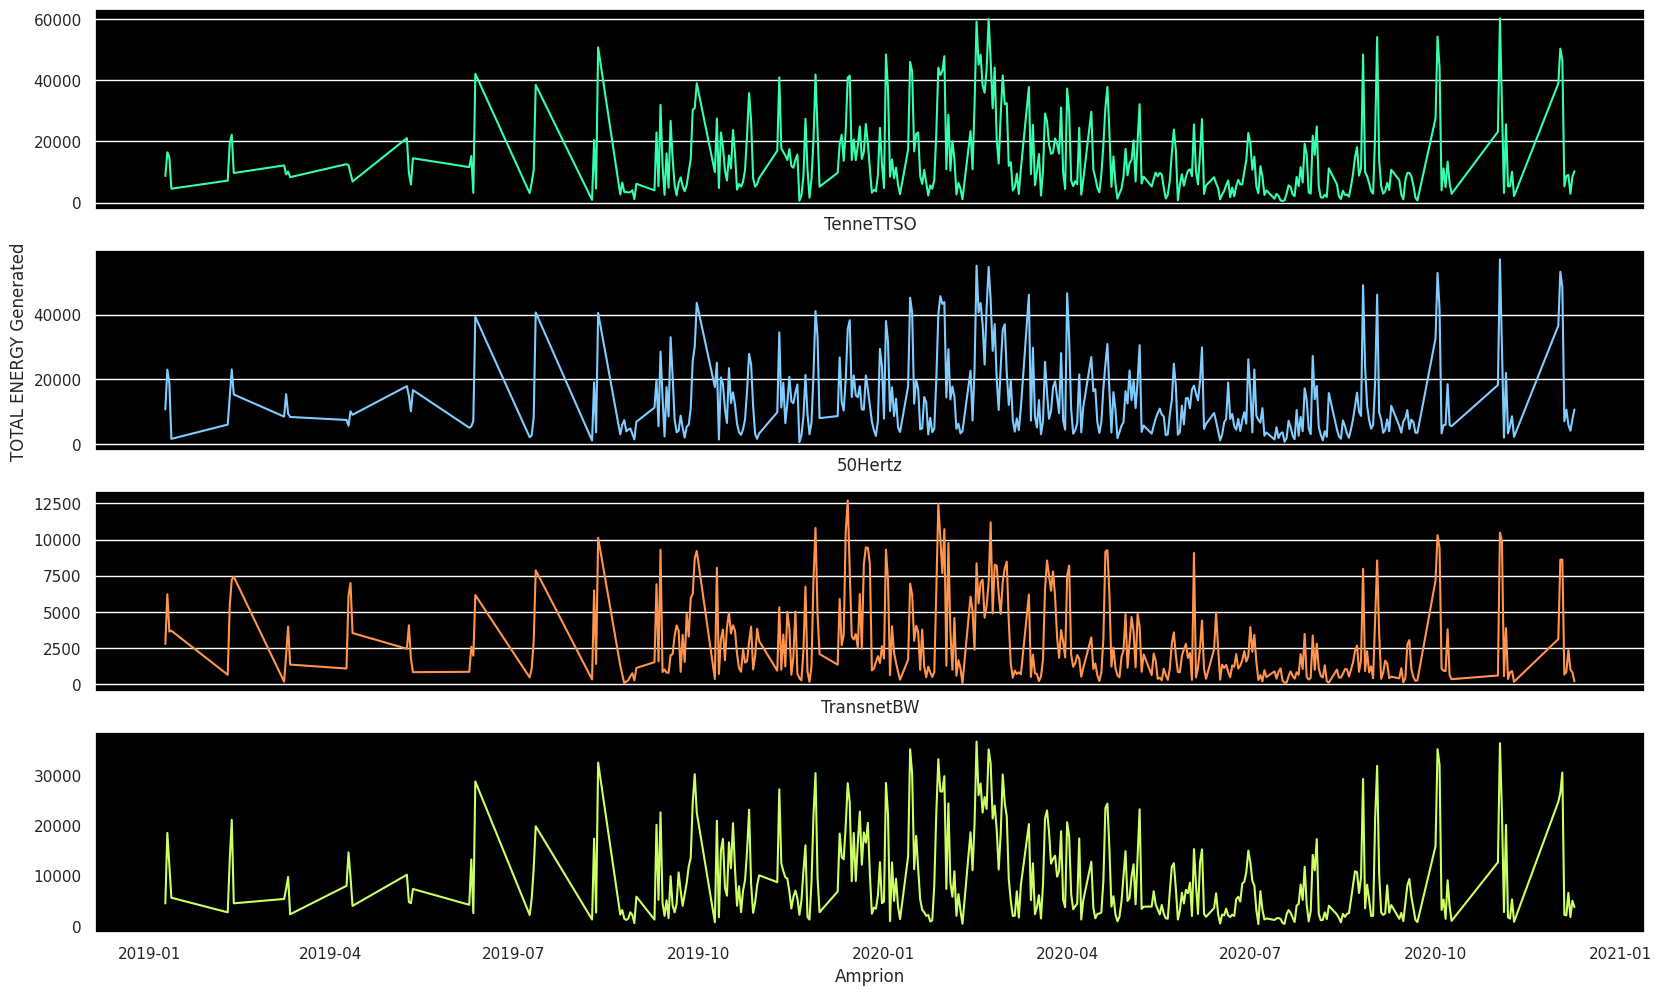

In [ ]:
sns.set(rc={'axes.facecolor':'#000000', 'figure.facecolor':'white'})
fig,ax=plt.subplots(4,1,figsize=(20,12))
#fig-1
sns.lineplot(x=df1['Date'],y=df1['total energy generated/day'],color='#33ffad',ax=ax[0])
plt.grid(False)
ax[0].set_xticks([])
ax[0].set_xlabel("TenneTTSO")
ax[0].set_ylabel("")
#fig-2
sns.lineplot(x=df2['Date'],y=df2['total energy generated/day'],color='#80ccff',ax=ax[1])
plt.grid(False)
ax[1].set_xticks([])
ax[1].set_ylabel("TOTAL ENERGY Generated")
ax[1].set_xlabel("50Hertz")
#fig-1
sns.lineplot(x=df3['Date'],y=df3['total energy generated/day'],color='#ff944d',ax=ax[2])
plt.grid(False)
ax[2].set_xticks([])
ax[2].set_xlabel("TransnetBW")
ax[2].set_ylabel("")
#fig-1
sns.lineplot(x=df4['Date'],y=df4['total energy generated/day'],color='#ccff66',ax=ax[3])
plt.grid(False)
ax[3].set_ylabel("")
ax[3].set_xlabel("Amprion")

In [ ]:
#Building ARIMA Model

df1=df1[['Date','total energy generated/day']]
df2=df2[['Date','total energy generated/day']]
df3=df3[['Date','total energy generated/day']]
df4=df4[['Date','total energy generated/day']]

In [ ]:
#check if stationary using adfuller

from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df1['total energy generated/day'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
print("for df1")
adfuller_test(df1['total energy generated/day'])

for df1
ADF Test Statistic : -2.8986826714279523
p-value : 0.04550139945219754
#Lags Used : 10
Number of Observations Used : 386
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
print("for df2")
adfuller_test(df2['total energy generated/day'])

for df2
ADF Test Statistic : -2.9889537234582235
p-value : 0.035938940022690505
#Lags Used : 10
Number of Observations Used : 386
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
print("for df3")
adfuller_test(df3['total energy generated/day'])

for df3
ADF Test Statistic : -2.364846381795361
p-value : 0.15190500417901637
#Lags Used : 16
Number of Observations Used : 380
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
print("for df4")
adfuller_test(df4['total energy generated/day'])

for df4
ADF Test Statistic : -4.880982001776955
p-value : 3.797210701864706e-05
#Lags Used : 4
Number of Observations Used : 392
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


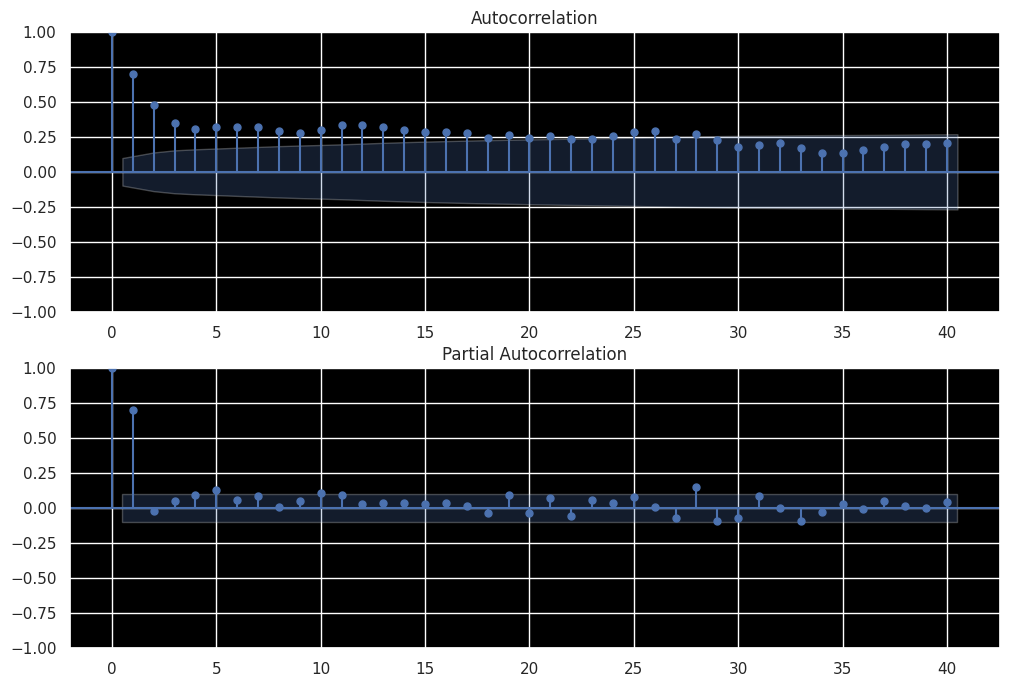

In [ ]:
#lets plot the graph to find the suitable value of P and Q
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df1['total energy generated/day'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df1['total energy generated/day'],lags=40,ax=ax2)

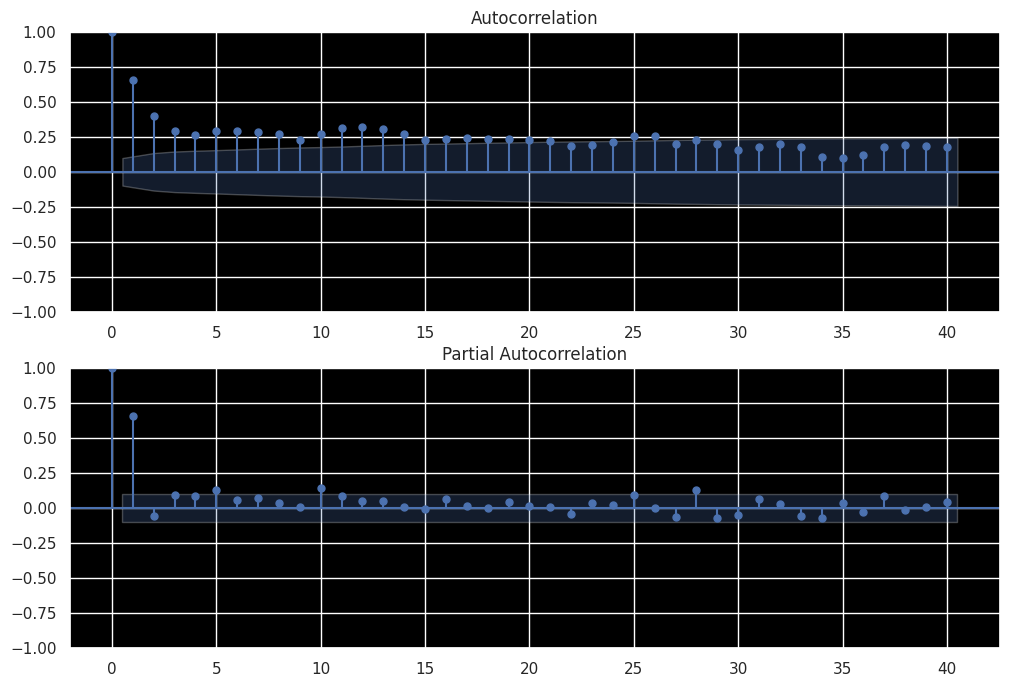

In [ ]:
#lets plot the graph to find the suitable value of P and Q - df2
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df2['total energy generated/day'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df2['total energy generated/day'],lags=40,ax=ax2)

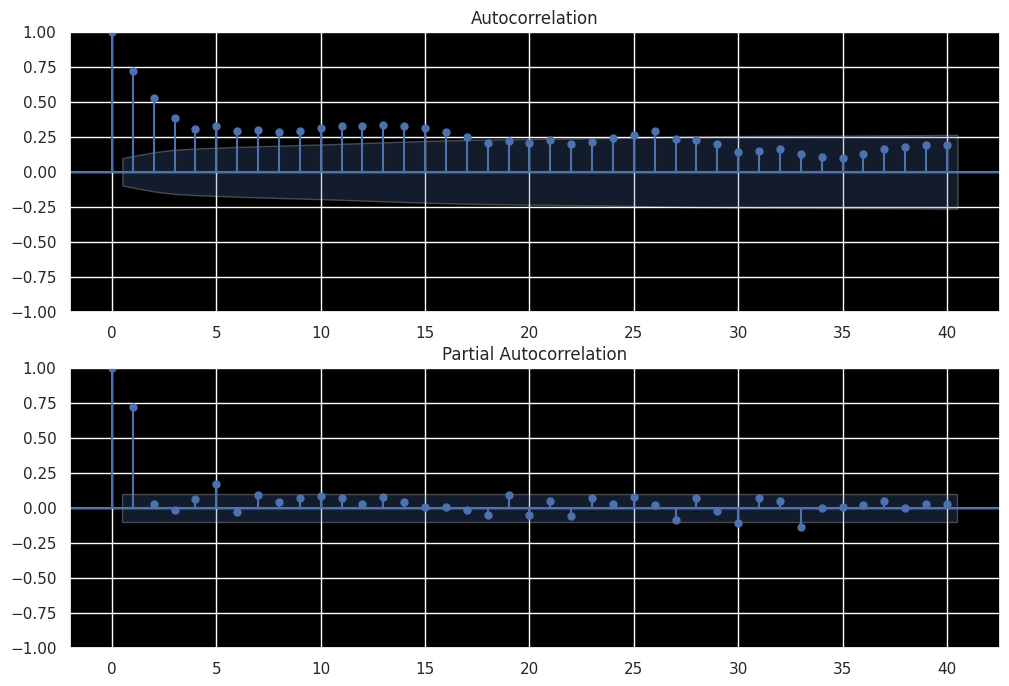

In [ ]:
#lets plot the graph to find the suitable value of P and Q - df4 #ampiron
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df4['total energy generated/day'],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df4['total energy generated/day'],lags=40,ax=ax2)

In [ ]:
#simple arima TenneTTSO
# p=4,d=0(as difference =0),q=1
import statsmodels.api as sm
train_data = df1['total energy generated/day']
order = (4,0,1)

model = sm.tsa.arima.ARIMA(train_data, order=order)
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     total energy generated/day   No. Observations:                  397
Model:                         ARIMA(4, 0, 1)   Log Likelihood               -4169.047
Date:                        Tue, 28 Nov 2023   AIC                           8352.095
Time:                                04:31:32   BIC                           8379.982
Sample:                                     0   HQIC                          8363.142
                                        - 397                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.408e+04   4974.721      2.831      0.005    4333.488    2.38e+04
ar.L1          1.5648      0.064     24.384      0.000       1.439       1.691
ar.L2         -0.6594      0.089     -7.435      0.000      -0.833      -0.486
ar.L3          0.0193      0.085      0.226      0.821      -0.148       0.186
ar.L4          0.0655      0.054      1.210      0.226      -0.041       0.171
ma.L1         -0.9053      0.040    -22.521      0.000      -0.984      -0.826
sigma2      8.151e+07      2.764   2.95e+07      0.000    8.15e+07    8.15e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               118.63
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.09e+22. Standard errors may be unstable.
"""

<ipython-input-128-31eef9e22076>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast']=result.predict(start=100,end=397,dynamic=True)


<Axes: >

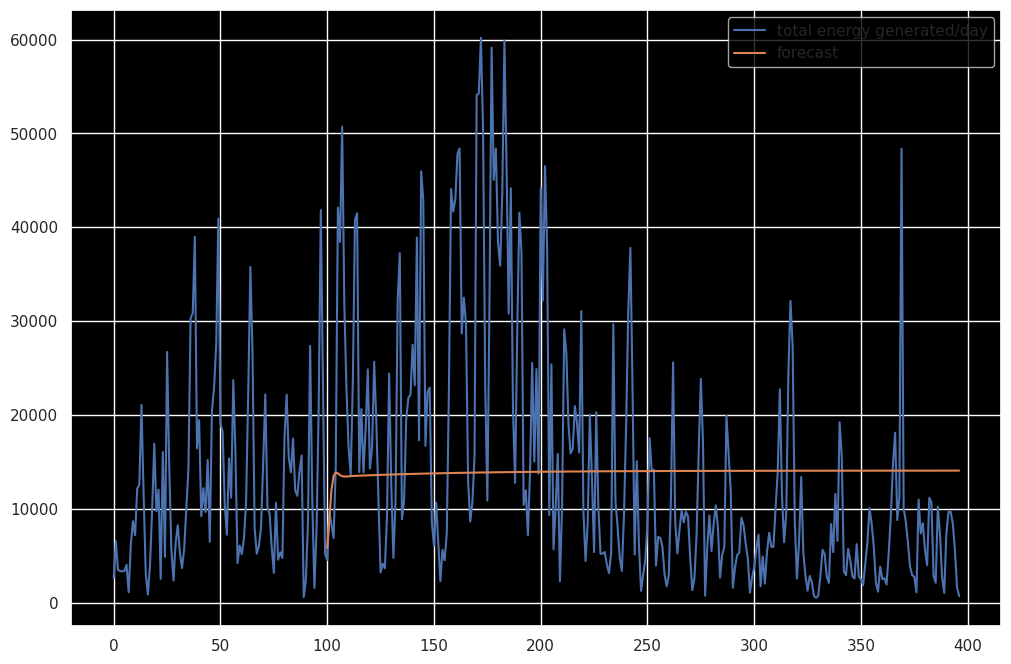

In [ ]:
df1['forecast']=result.predict(start=100,end=397,dynamic=True)
df1[['total energy generated/day','forecast']].plot(figsize=(12,8))

In [ ]:
#sarimax
# p=4,d=0(as difference =0),q=1
import statsmodels.api as sm
train_data = df1['total energy generated/day']

model = sm.tsa.SARIMAX(train_data, order=(2, 0, 1),seasonal_order=(2,0,1,30))
result2 = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<ipython-input-124-da1fac7d0632>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['forecast']=result2.predict(start=178,end=250,dynamic=True)


<Axes: >

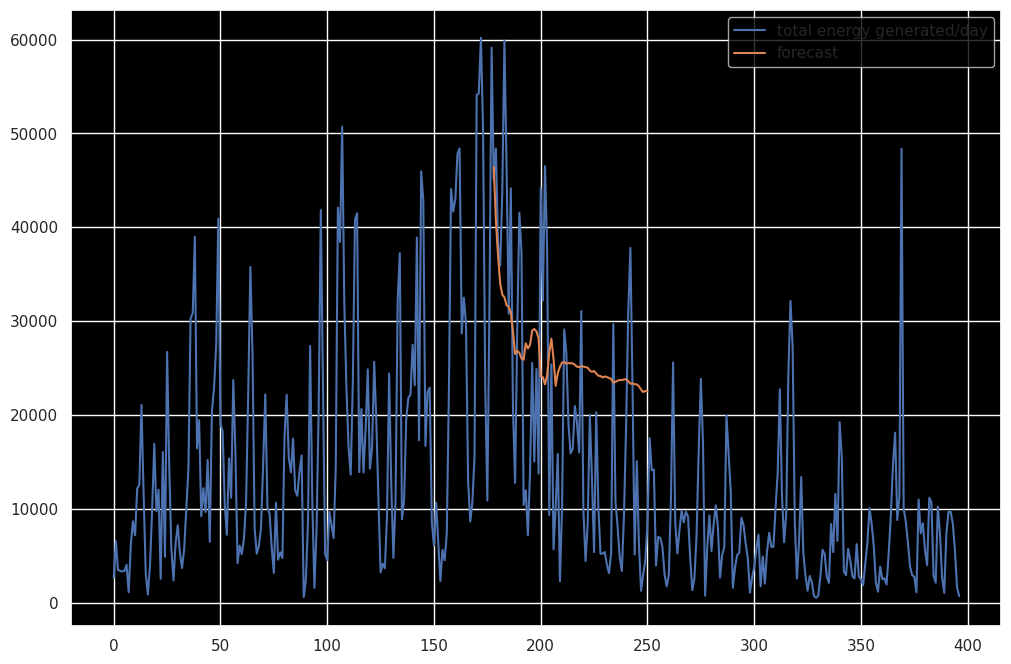

In [ ]:
df1['forecast']=result2.predict(start=178,end=250,dynamic=True)
df1[['total energy generated/day','forecast']].plot(figsize=(12,8))

<ipython-input-130-371684ba2c25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['forecast']=result.predict(start=100,end=397,dynamic=True)


<Axes: >

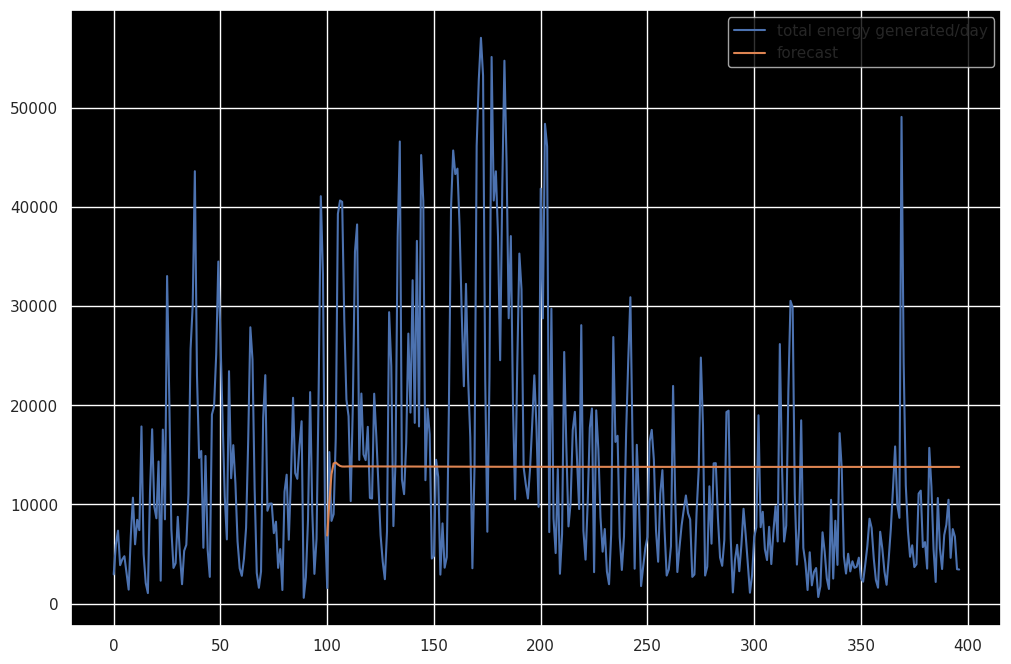

In [ ]:
#simple arima 50Hertz
# p=4,d=0(as difference =0),q=1
import statsmodels.api as sm
train_data = df2['total energy generated/day']
order = (4,0,1)

model = sm.tsa.arima.ARIMA(train_data, order=order)
result = model.fit()

df2['forecast']=result.predict(start=100,end=397,dynamic=True)
df2[['total energy generated/day','forecast']].plot(figsize=(12,8))

<ipython-input-132-993e4a6611ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['forecast']=result2.predict(start=178,end=250,dynamic=True)


<Axes: >

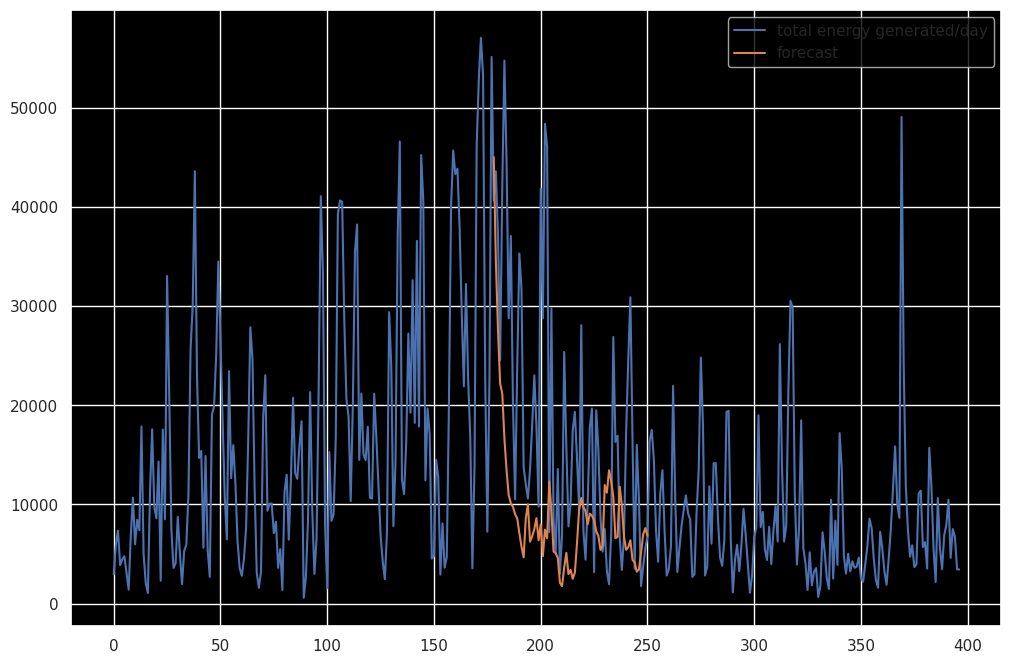

In [ ]:
#sarimax - 50Hertz
# p=4,d=0(as difference =0),q=1
import statsmodels.api as sm
train_data = df2['total energy generated/day']

model = sm.tsa.SARIMAX(train_data, order=(2, 0, 1),seasonal_order=(2,0,1,30))
result2 = model.fit()

df2['forecast']=result2.predict(start=178,end=250,dynamic=True)
df2[['total energy generated/day','forecast']].plot(figsize=(12,8))

<Axes: >

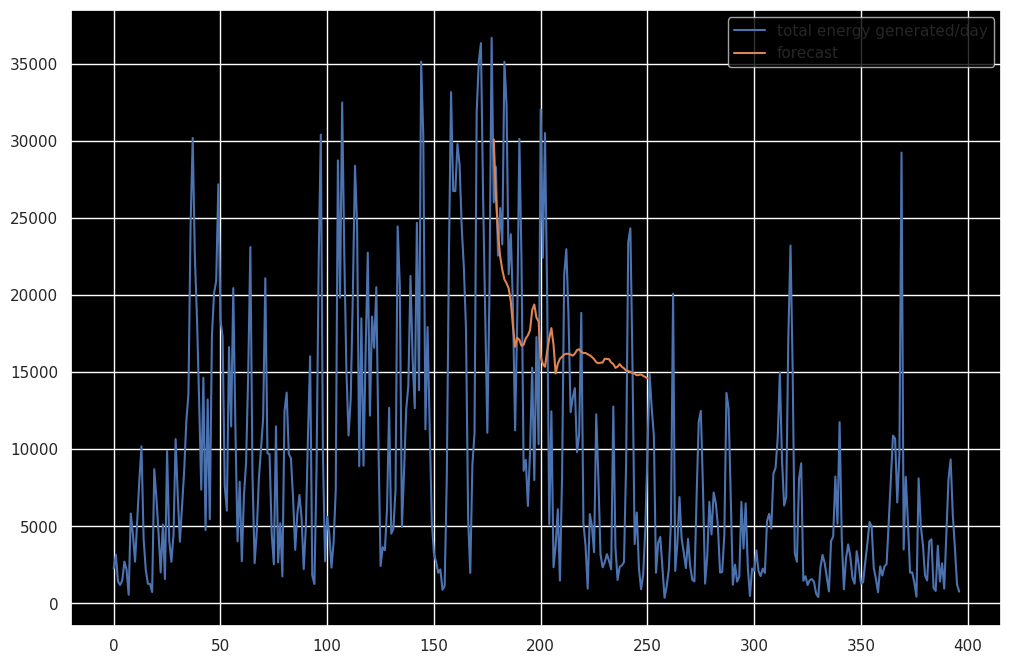

In [ ]:
#sarimax Ampiron
# p=4,d=0(as difference =0),q=1
import statsmodels.api as sm
train_data = df4['total energy generated/day']

model = sm.tsa.SARIMAX(train_data, order=(2, 0, 1),seasonal_order=(2,0,1,30))
result2 = model.fit()

df4['forecast']=result2.predict(start=178,end=250,dynamic=True)
df4[['total energy generated/day','forecast']].plot(figsize=(12,8))